## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

In [38]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn import metrics


Leitura de Dados:

In [53]:
dados = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/REGRESSÃO LINEAR 2/dataset.csv',sep=';')

In [54]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [55]:
dados.shape

(5000, 4)

Analise Preliminares:
    
     - Estatistica descritivas

In [56]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


Matriz de correlação:
  
   - O coeficente de correlação é uma medida de associação linear entre duas variaveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

In [57]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Graficos;

In [58]:
sns.set_palette("Accent")
sns.set_style("darkgrid")


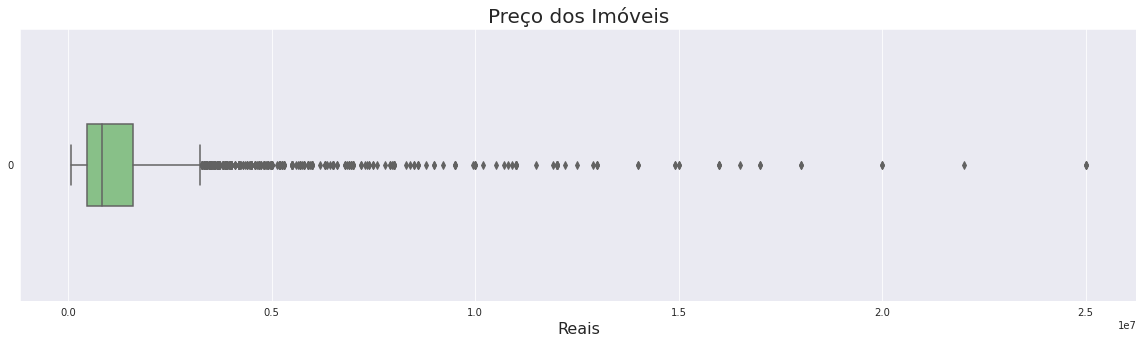

In [59]:

ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20,5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais',fontsize=16)
ax;

2.2 Distribuição de Frequência;

  - Distribuição de Frquência da variável de dependentes(y)

AttributeError: ignored

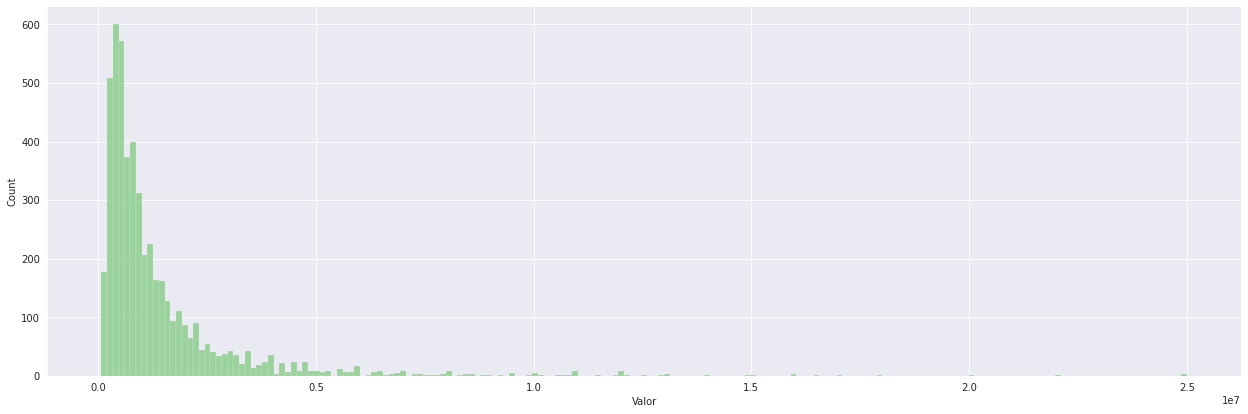

In [60]:
ax = sns.displot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

Os dados têm uma assimetria a direita

Dispersão Entre as Variaveis:

   - Gráficos de Dispersão entre as Variaveis do Dataset
   

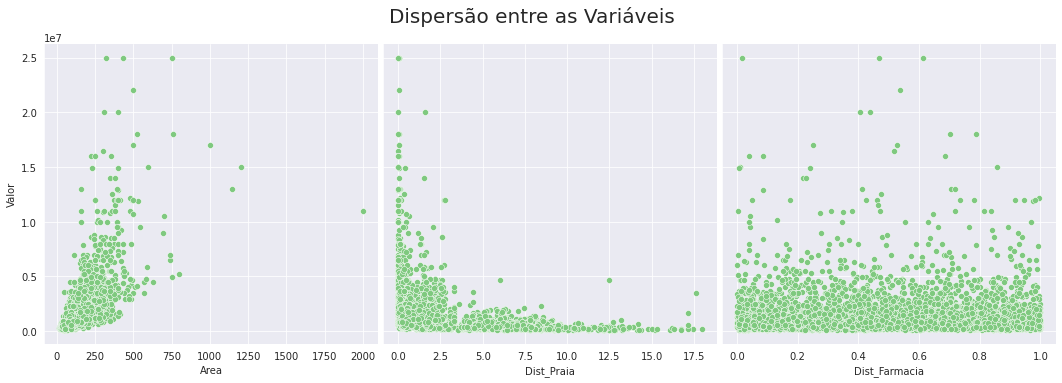

In [61]:
ax = sns.pairplot(dados, y_vars="Valor", x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;


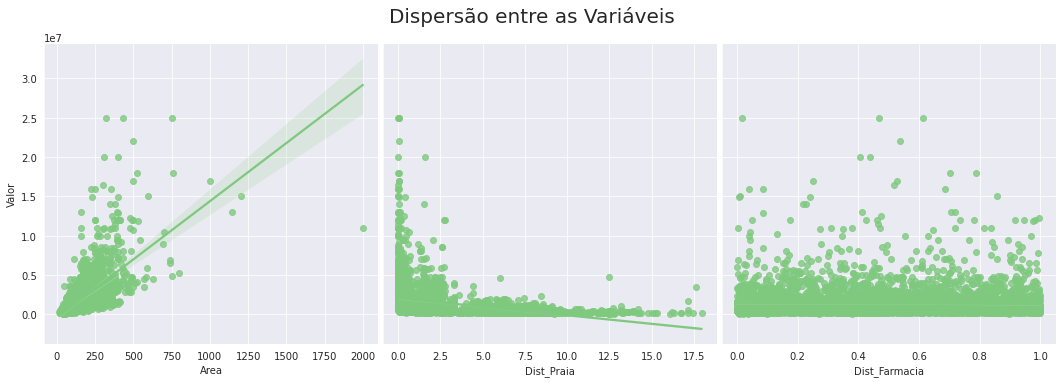

In [62]:
#Traçar uma reta dom a função KING

ax = sns.pairplot(dados, y_vars="Valor", x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'],kind='reg',height=5)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

Os dados estão uma bagunça, precisamos transformar os dados

## Distribuição Normal
<hr>

### Por quê? 



 - Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.)


Utilizaremos a biblioteca Numpy.

In [63]:
np.log(1)

0.0

In [64]:
dados['log_Valor']  = np.log(dados['Valor'])
dados['log_Area']  = np.log(dados['Area'])
dados['log_Dist_Praia']  = np.log(dados['Dist_Praia'] + 1)#tem um valor zero então vamos somar 1 em todos os dados 
dados['log_Dist_Farmacia']  = np.log(dados['Dist_Farmacia'] + 1)

In [65]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


AttributeError: ignored

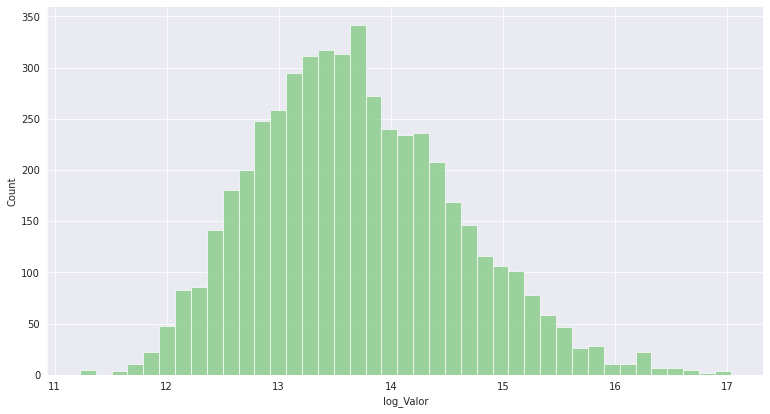

In [66]:
ax = sns.displot(dados['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

Conseguimo eliminar os dados todos a direita, temos quase uma assimetria perfeita

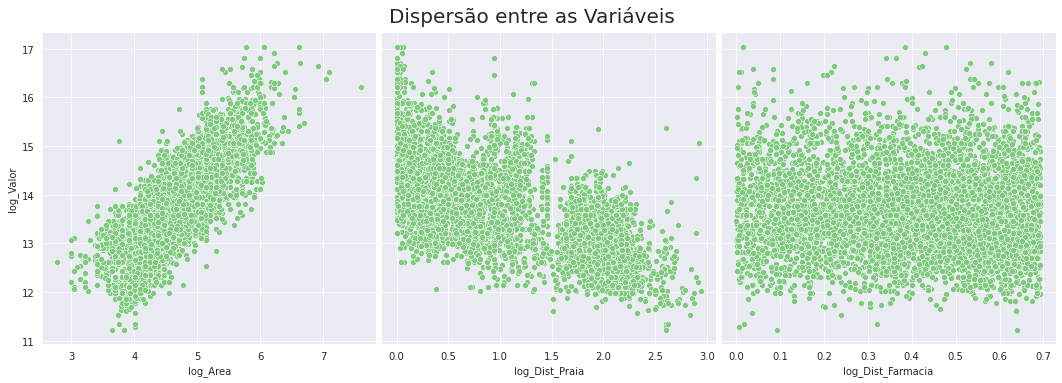

In [67]:
#Vamos ver se tem uma relaço Linear

ax = sns.pairplot(dados, y_vars="log_Valor", x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

O gráfico mostra uma correlação positiva no log_Area e uma relação negativa no log_Dist_Praia, quanto mais longe da praia menor é o valor do imovel

Criando os Datasets de Treino e Teste

Criando um Dataframe para armazenar as variáveis explicativas(y)

In [68]:
y = dados['log_Valor']

Criando um Dataframe para armazenar as varviaveis explicativas (x)

In [69]:
x = dados[['log_Area','log_Dist_Praia', 'log_Dist_Farmacia']]

Temos agora os dois grupos de variaveis que iremos alimentar o nosso dataset

CRIANDO OS DATASETS DE TREINO E TESTES

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>


Edstimando o Modelo com stabmodels

In [49]:
x_train_com_constante = sm.add_constant(x_train)
x_train_com_constante

,const,log_Area,log_Dist_Praia
2661,1.0,5.945421,0.000000
912,1.0,3.135494,0.972865
3042,1.0,4.317488,1.794961
141,1.0,3.401197,0.310455
3854,1.0,5.676754,0.032193
...,...,...,...
3657,1.0,5.075174,2.023480
979,1.0,4.174387,2.296141
2389,1.0,4.394449,1.367741
447,1.0,3.951244,2.166841


In [50]:
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst = True).fit()

In [51]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:56:51   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

Decobrimos que o log_Dist_Farmacia não é estatisticamente significativa porque o paramentro P>|t| 0.603 é bem maior que 0.5.

Então vamos eliminar a variavel 

MODIFICANDO O MODELO E AVALIANDO NOVAMENTE O AJUSTE

Criando um novo conjunto de variaáveis explicativos(x)

In [52]:
x = dados[['log_Area', 'log_Dist_Praia']]

Criando o Modelo de Treino e Teste

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

In [34]:
x_train

,log_Area,log_Dist_Praia
2661,5.945421,0.000000
912,3.135494,0.972865
3042,4.317488,1.794961
141,3.401197,0.310455
3854,5.676754,0.032193
...,...,...
3657,5.075174,2.023480
979,4.174387,2.296141
2389,4.394449,1.367741
447,3.951244,2.166841


Estiamando o Modelo com o stabmodels

In [35]:
x_train_com_constate = sm.add_constant(x_train)

In [36]:
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst = True).fit()

Avaliando as estatísticas de teste do novo modelo 

- Teste de significancia conjunta dos parametros
   
    * Prob (F-statistic) < = 0.05(ok)
- Teste de significancia individual dos Parametros

    * P > |t| < = 0.05 (ok)    

In [37]:
#Estimar mais um vez o modelo

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:02:15   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

ESTIMANDO O MODELO COM OS DADOS DE TREINO

In [39]:
#Vamos fazer a estimativa 
#INstanciado a classe LinearRegression

modelo  = LinearRegression()

In [40]:
#Utilizadno o método fi() do objeto "modelo " para estimar nosso modelo linear utilizando os 
# dados dce Treino (y_train e X_train)

modelo.fit(x_train, y_train)

LinearRegression()

In [42]:
print("R² = {}".format(modelo.score(x_train, y_train).round(3)))

R² = 0.805


Gerando Previsões para os dados de TESTE(x_test) utilizando o método predict() do objeto "modelo"

In [43]:
#fazer as previsões de x_test

y_previsto = modelo.predict(x_test)

Obtendo o coeficiente de determinação (R)para as previsões do nosso modelo

In [44]:
print('R  = %s'% metrics.r2_score(y_test, y_previsto).round(3))

R  = 0.79


A previsao ficou bem robusta, quase a casa dos 80%

OBTENDO PREVISÕES PONTUAIS

Dados de Entrada:

In [45]:
entrada = x_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


Gerando Previsão Pontual:

In [46]:
modelo.predict(entrada)[0]# O zero porque quero a inicilização inicial desse array

14.28482006184788


Invertendo a Transformação para Obter a estimativa em R$


In [47]:
#
#Esse valor esta em LOG(Logaritmo) vou transformar em Real 
np.exp(modelo.predict(entrada)[0])

1598889.784779439

Temos os valor ajustado do imóvel. o valor é de 1.598,888,90

CRINADO UM SIMULADO SIMPLES

In [70]:
# O cliente deseja um imóvel com uma área de 250mt e com a distancia da praía de 1KM


Area = 250
dist_Praia = 1

entrada = [[np.log(Area), np.log(dist_Praia + 1 )]]


print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 2777292.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


A estimativa da escolha do imovel vai ser de 2.777,292,84 

INTERPRETAÇÃO DOS COEFICIENTES ESTIMADOS

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$

In [73]:
modelo.intercept_

#Esse valor esta em LOG 

9.334916409800329

In [74]:
#Transformar para Reais

np.exp(modelo.intercept_)

11326.681428069842

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [75]:
modelo.coef_

array([ 1.05807818, -0.49061226])

Confirmando a Ordem das Variaves Explicativas no Dataframe

In [76]:
x.columns

Index(['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], dtype='object')

Criando uma lista com os nomes das variveis do modelo

In [77]:
#Criar uma LIsta
index = ["Intercept", "Área(m²)", "Distancia até a Praia(KM"]

Criando um Dataframe para o armazenamer os coeficiente do modelo

In [80]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercept,9.334916
Área(m²),1.058078
Distancia até a Praia(KM,-0.490612


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

ANÁLISE GRÁFICA DOS RESULTADOS DO MODELO

Gerando as previsões do modelo para os dados de TREINO

In [82]:
y_previsto_train = modelo.predict(x_train)

Gráfico de dispersão entre o valor estimado em valor Real 

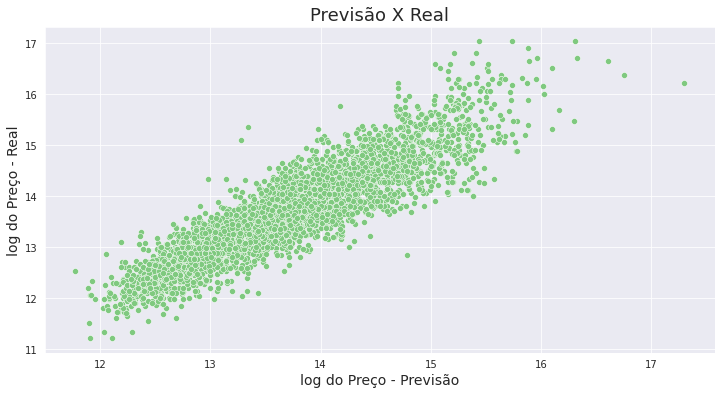

In [84]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax;

OBTENDO OS RESÍDUOS

In [85]:
residuo = y_train - y_previsto_train

PLotar a distribuição de Frequeência dos Resíduos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


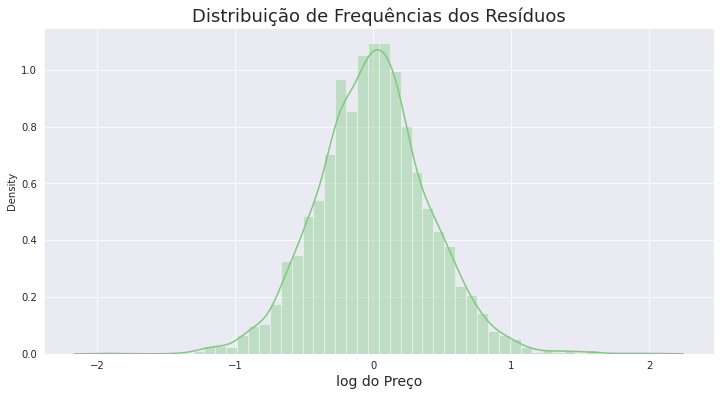

In [87]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax;

Temos um formato dfe sino, os nossos dados estão comportados. 